### Scikit-learn

Scikit-learn (http://scikit-learn.org/stable/) is a library built from Numpy that implements most (classical) machine learning algorithms (not deep learning).

Detailed information about this library can be found in the user's guide: http://scikit-learn.org/stable/user_guide.html

In [7]:
#!pip install scikit-learn

In [8]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn import datasets

random.seed(1234)

In [9]:
print(sklearn.__version__)

1.4.0


### Example: Real Estate Price Prediction with sklearn 🏡

In this example we will use the sklearn library to predict the price of a house in Boston, from a 70's dataset.

Here is some info about the dataset:

![boston](images/boston.png)


**1. We load the dataset**

In [10]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\brian\AppData\Local\Temp\ipykernel_4880\16828617.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


**2. We set our features (X) and our target (y).**

In our case, the target will be the median value of the house (MEDV), and the features will be the rest of the columns.

In [11]:
X, y = data, target

**Question**: What type of objects are X and y? And their dimensions?

In [12]:
X.shape, y.shape

((506, 13), (506,))

**3. Data exploration**

Let's compute the the correlations between the features and the target.

In [13]:
corr = np.corrcoef(X, y, rowvar=False)[:, -1]
corr

array([-0.38830461,  0.36044534, -0.48372516,  0.17526018, -0.42732077,
        0.69535995, -0.37695457,  0.24992873, -0.38162623, -0.46853593,
       -0.50778669,  0.33346082, -0.73766273,  1.        ])

**Question**: What feature is the most correlated with the target?

In [14]:
idx = -1

Plot a scatter plot of the most correlated feature with the target.

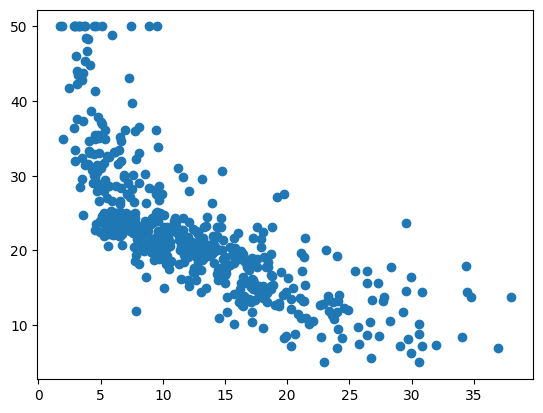

In [15]:
x = X[:, idx]   # we pick this feature for later
fig, ax = plt.subplots()
plt.scatter(x, y)

**4. Fitting a model**

Let's start fitting a linear regression model. But first, we need to split our data into train and test sets.


In sklearn, we can do this with the function train_test_split. In this function, we can specify the size of the test set (20%, for example) and the random state (so everytime we get the same partition).

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.2)

Now we can fit the model with the train data. In sklearn, we can do this in the following steps:

- Create an instance of the model
- Fit the model to the train data using the `fit` method

In [17]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

We can inspect the coefficients of the model with the `coef_` and `intercept_` attributes.

In [18]:
beta = lm.coef_
beta0 = lm.intercept_

print(beta)
print(beta0)

[-1.02035256e-01  6.01151037e-02  3.47699609e-02  3.00350930e+00
 -2.04147071e+01  2.89371393e+00 -5.32341284e-03 -1.76260440e+00
  3.38923461e-01 -1.34787063e-02 -1.01921362e+00  1.03741454e-02
 -5.25691400e-01]
45.737181228955556


**5. Compute predictions over the test set and evaluate the model**

In [19]:
y_pred = lm.predict(X_test)

Remember that when $y$ is a continuous variable:

The linear regression model has the following parametric form:

$$
\hat{y} = \beta^\intercal x + \beta_0 = \beta_0 + \beta_1 x_1 \ldots + \beta_p x_p 
$$

where $\hat{y} \in \mathbb{R}$ is the variable to predict and the data has $p$ columns, $x \in \mathbb{R}^p$. 

Assuming a set of training data, $\mathcal{D_{tr}} = \lbrace (x, y) \rbrace$, the parameters $\beta, \beta_0$ can be adjusted by solving the following optimization problem (minimization):

$$
\min_{\beta, \beta_0} \sum_{x \in \mathcal{D_{tr}}} (\hat{y} - y )^2 = \min_{\beta, \beta_0} \sum_{x \in \mathcal{D_{tr}}} (\beta^\intercal x + \beta_0 - y )^2
$$

On another evaluation set $\mathcal{D_{te}}$, we can evaluate the quality of the predictions. The most common ones are 

* Mean squared error $\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$

* Mean absolute error $\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$

* Coefficient of determination $R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

The $R^2$ represents the proportion of variance explained. The best score is 1. A constant model that always predicts the mean of the population $y$ would get 0, and worse models would have negative $R^2$.

In [20]:
# compute the MAE

mae = np.mean(np.abs(y_test - y_pred))
mae

3.578934913833634

Is this error good or bad? We can compare it with the mean of the target in the test set.

In [21]:
np.abs(y_test).mean()

23.019607843137255

So it's like 15% of relative error.

To compute the R^2 score, we can use the `score` method of the model:

In [22]:
r2 = lm.score(X_test, y_test)
r2

0.7665382927362878

Seems kinda good

**Question** : Which variable has the highest (positive) impact on the price of a house?

**6. Using different models**

### Decision trees

In [23]:
from sklearn.tree import DecisionTreeRegressor  # always mind the Regressor or Classifier variant, depending on the task
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = np.mean(np.abs(y_test - y_pred))
mae

2.8754901960784323

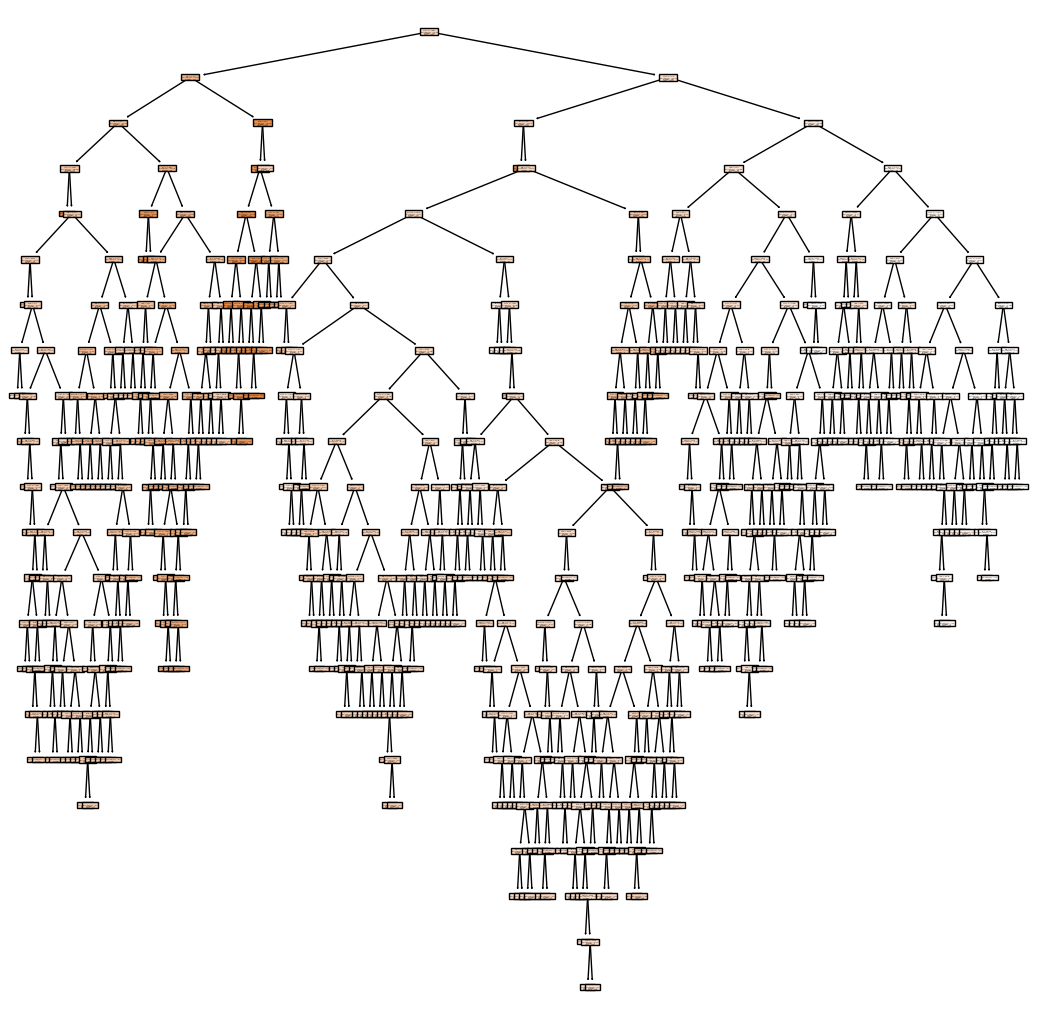

In [24]:
from sklearn.tree import plot_tree

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

fig, ax = plt.subplots(figsize=(13, 13))
plot_tree(model, ax=ax, feature_names=feature_names, filled=True);
plt.savefig("tree.png", dpi=700)

An ensemble of decision trees, trained over subsets of the data, is called a random forest. Random forests are among the most popular machine learning methods thanks to their relatively good accuracy, robustness and ease of use.

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = np.mean(np.abs(y_test - y_pred))
mae

2.076196078431373

## Recap scikit-learn

<div class="alert alert-block alert-success">
<p> Scikit-learn is a collection of classical machine learning models over numpy arrays. </p>

<p> Very easy to use: same functions for all models: fit and predict. </p>
</div>

### Classifier example: handwritten digit recognition 📝

We will use the digits dataset from sklearn. This dataset contains 1797 images of digits (8x8 pixels), and the target is the digit itself (10 classes: 0 to 9).

Handwritten character recognition is a typical problem in computer vision, and one of the first successful applications of (deep) machine learning, in applications like:

* Postal services
* Banks, for check processing

In [26]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

In [27]:
X.shape

(1797, 64)

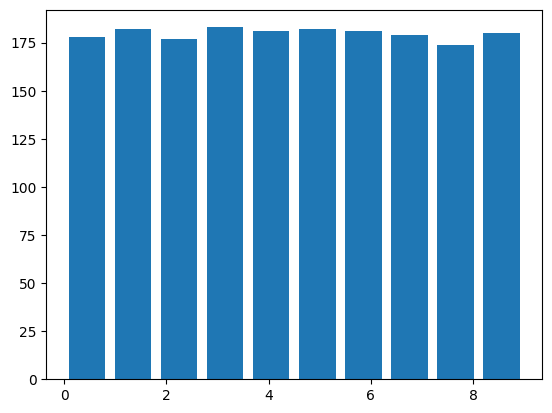

In [28]:
plt.hist(y, bins=10, rwidth=0.8);

In [29]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

Let's plot a few examples of the dataset:

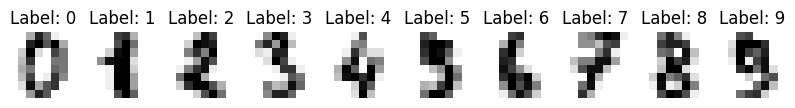

In [30]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("Label: %i" % label)

### Using multiclass logistic regression

For multiclass logistic regression - a generalization of the binary logistic regression to more than two classes, the model has the following parametric form:

$$
P(y = k | x) = \frac{\exp(\beta_k ^T x + \beta_{k0})}{\sum_{j=1}^{K} \exp(\beta_j ^T x + \beta_{j0})}
$$

where $y$ can take possible values $1, 2, \ldots, K$, so there are $K$ sets of parameters $\beta, \beta_0$ to be learned. Each set gives the (unnormalized probabilities) of the inputs being in one particular category.

Given a set of training data, $\mathcal{D_{tr}} = \lbrace (x, y) \rbrace$, these parameters can be estimated by solving the following optimization problem (maximization):

$$
\max_{\beta_1, \beta_{1_0} , \ldots, \beta_K, \beta_{K_0}} \sum_{(x, y) \in \mathcal{D_{tr}}} \log P(y | x)
$$

or equivalently (minimization):

$$
\min_{\beta_1, \beta_{1_0} , \ldots, \beta_K, \beta_{K_0}} - \sum_{(x, y) \in \mathcal{D_{tr}}} \log P(y | x)
$$

On another evaluation set $\mathcal{D_{te}}$, we can evaluate the quality of the predictions. For multiclass problems, a common score is the accuracy:

* Accuracy $\text{ACC}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} 
\sum_{i=0}^{n_{\text{samples}}-1} 1_{\lbrace \hat{y}_i = y_i \rbrace}$ 

where $1_{\lbrace \hat{y}_i = y_i \rbrace}$ is the indicator function which is equal to 1 if $\hat{y}_i$ equals $y_i$ and 0 otherwise. 

Other common metrics typically used for multiclass classification include:

* Macro-averaged precision, recall and F-score
* Micro-averaged precision, recall and F-score
* Weighted precision, recall and F-score

(we will further study them during the course)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)

In [32]:
from sklearn.linear_model import LogisticRegression

**Exercise 1** Fit a logistic regression model to the digits dataset. Compute the accuracy on the test set.

In [33]:

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**Exercise 2** Can you improve the accuracy by using a different model? 

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

NameError: name 'X_train' is not defined

**Recap**: through the previous accuracies may seem high, they are not that good.

The following is a list of error rates (100 - accuracy %) obtained over a very similar dataset (MNIST) by different methods:

https://en.wikipedia.org/wiki/MNIST_database

![mnist](images/mnist_results.png)